# This notebook is the continuation of the Reddit-EDA.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import time
import requests
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.base import TransformerMixin
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
# create a new df reading from the reddit_EDA.csv -- refer to Reddit-EDA.ipynb
final_df_2 = pd.read_csv('./reddit_EDA.csv')

In [3]:
# display first 3 rows
final_df_2.head(3)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp,is_datascience,title_text
0,Knock-knock,Who's there? \n**A parrot!** \nA parrot who...,Jokes,1552069053,motsanciens,0,0,True,2019-03-08,0,Knock-knock Who's there? \n**A parrot!** \n...
1,How did the dentist suddenly become a brain su...,A slip of the hand.,Jokes,1552069079,roastedtoperfection,0,4,True,2019-03-08,0,How did the dentist suddenly become a brain su...
2,I hate build a bear. I took my chihauhua there...,AND the stuffed animal they gave me keeps bark...,Jokes,1552069382,RikorperationYT,0,2,True,2019-03-08,0,I hate build a bear. I took my chihauhua there...


In [4]:
final_df_2.shape

(3523, 11)

In [5]:
# check for nulls if any -- should not be any nulls as they have been cleaned earlier
final_df_2.isnull().sum()

title             0
selftext          0
subreddit         0
created_utc       0
author            0
num_comments      0
score             0
is_self           0
timestamp         0
is_datascience    0
title_text        0
dtype: int64

In [6]:
# check the value counts for subreddit column
final_df_2['subreddit'].value_counts()

Jokes          2129
datascience    1394
Name: subreddit, dtype: int64

In [7]:
final_df_2['subreddit'].value_counts(normalize = True)

Jokes          0.604315
datascience    0.395685
Name: subreddit, dtype: float64

In [8]:
len(final_df_2)

3523

In [9]:
# defining X and y

X = final_df_2['title_text']
y = final_df_2['is_datascience']

In [10]:
#  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size = 0.25,
                                                stratify = y)
# Countvectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train = cv.transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

# standard scaler
ss = StandardScaler()              # instantiate the standard scaler
ss.fit(X_train)                    # fit on X_train
X_train_ss = ss.transform(X_train) # transfor X_train
X_test_ss = ss.transform(X_test)   # transform X_test

/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# display X_train
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
# display y_train
y_train[0:10]

844     0
3453    1
2037    0
2261    1
1658    0
237     0
2418    1
3057    1
2038    0
96      0
Name: is_datascience, dtype: int64

# Logistic Regression

In [13]:
log_reg = LogisticRegression()            # instantiate the model
log_reg.fit(X_train_ss, y_train)          # fit the model on scaled X_train
print(log_reg.score(X_train_ss, y_train)) # display the log_reg train score
print(log_reg.score(X_test_ss, y_test))   # display the log_reg test score


/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0
0.9432463110102156


In [14]:
y.value_counts(normalize = True)

0    0.604315
1    0.395685
Name: is_datascience, dtype: float64

In [15]:
log_reg.coef_

array([[-0.00447646,  0.00779359, -0.00049   , ..., -0.01096852,
        -0.01096852, -0.01096852]])

In [16]:
# display first 10 records
cv.get_feature_names()[0:10]

['00',
 '000',
 '00000',
 '00001',
 '0000167',
 '0000515',
 '003',
 '0047526',
 '0073',
 '008322']

In [17]:
coef_df = pd.DataFrame(log_reg.coef_.T, index = cv.get_feature_names(), columns = ['coefs'])
coef_df['coef_abs'] = coef_df['coefs'].abs()
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

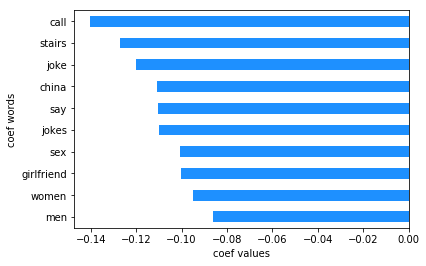

In [18]:
coef_df['coefs'].tail(10).plot(kind = 'barh',color = 'dodgerblue')
plt.xlabel('coef values')
plt.ylabel('coef words')
plt.show();

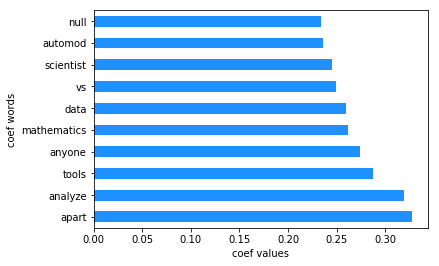

In [19]:
coef_df['coefs'].head(10).plot(kind = 'barh', color = 'dodgerblue')
plt.xlabel('coef values')
plt.ylabel('coef words')
plt.show();

In [20]:
# exponentiation of coefficients
# np.exp(-0.175)

In [21]:
# np.exp(0.38)

# Bayes Classifier

In [22]:
mnb = MultinomialNB()             # instantiate the model
mnb.fit(X_train, y_train)         # fit the model
print(mnb.score(X_train, y_train))# mnb train score
print(mnb.score(X_test, y_test))  # mnb test score

0.987887963663891
0.9750283768444948


In [23]:
bnb = BernoulliNB()                # instantiate the model
bnb.fit(X_train, y_train)          # fit the model
print(bnb.score(X_train, y_train)) # bnb train score
print(bnb.score(X_test, y_test))   # bnb test score

0.9341408024224073
0.9296254256526674


In [24]:
# write a function which accepts the parameters:
# model- name of the model to fit in
# scaled = True or False
def model_fitter(model, scaled):
    if scaled:
        train_data = X_train_ss
        test_data = X_test_ss
    else:
        train_data = X_train
        test_data = X_test
        
    model.fit(train_data, y_train)
    print(model.score(train_data, y_train))
    print(model.score(test_data, y_test))
    
    return model
        

In [25]:
bnb = model_fitter(BernoulliNB(),scaled = False )

0.9341408024224073
0.9296254256526674


In [26]:
bnb = model_fitter(BernoulliNB(),scaled = True )

0.9299772899318698
0.9182746878547106


In [27]:
# gaussian naive bayes
gnb = model_fitter(GaussianNB(), scaled = True)

1.0
0.887627695800227


In [28]:
class DenseTransformer(TransformerMixin):
    
    def fit(self, X, y=None, **kwargs):
        return self
    
    def transform(self, X, y=None, **kwargs):
        return X.todense()

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size = 0.25,
                                                stratify = y)


In [30]:
# pipeline

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('dt', DenseTransformer()),
    ('log_reg', LogisticRegression(solver = 'liblinear')),
    
])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [31]:
pipe.score(X_test, y_test)

0.9761634506242906

In [32]:
# create parameter space
params = {'cv__max_features':[200,300 ,400],
          'cv__max_df': [0.5, 0.75, 1.0],
          'log_reg__C': np.logspace(-2, 5, 3),
          'cv__min_df':[0.1,0.3],
          'log_reg__penalty' : ['l1', 'l2']
    
}

In [33]:
# gridsearch the best hyper parameters
gs = GridSearchCV(pipe,
                param_grid = params,
                cv = 3,
                verbose = 1
                )

In [34]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kkesari/anaconda3/en

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'cv__max_features': [200, 300, 400], 'cv__max_df': [0.5, 0.75, 1.0], 'log_reg__C': array([1.00000e-02, 3.16228e+01, 1.00000e+05]), 'cv__min_df': [0.1, 0.3], 'log_reg__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [35]:
print(gs.best_score_)

print(gs.best_params_)

print(gs.best_estimator_)

print(gs.cv)

0.9515518546555639
{'cv__max_df': 0.75, 'cv__max_features': 200, 'cv__min_df': 0.1, 'log_reg__C': 100000.0, 'log_reg__penalty': 'l1'}
Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_features=200, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
3


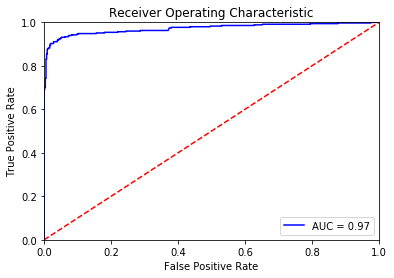

In [36]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gs.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

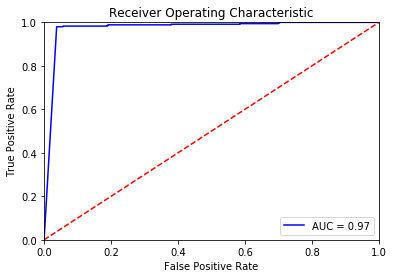

In [37]:
# calculate the fpr and tpr for all thresholds of the classification
# probs = gs.best_estimator_.predict_proba(X_test)
probs = mnb.predict_proba(X_test_ss)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
# create a new df 'coef_df' which holds the coefs values
coef_df = pd.DataFrame(mnb.coef_.T, index = cv.get_feature_names(), columns = ['coefs'])
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

In [39]:
coef_df.head()

,coefs
to,-3.509657
the,-3.553731
and,-3.776522
data,-4.019659
in,-4.032835


In [40]:
mnb.feature_count_

array([[ 3.,  9.,  0., ...,  2.,  2.,  2.],
       [ 1., 25.,  1., ...,  0.,  0.,  0.]])

In [41]:
jokes_token_count = mnb.feature_count_[0, :]
jokes_token_count

array([3., 9., 0., ..., 2., 2., 2.])

In [42]:
datascience_token_count = mnb.feature_count_[1, :]
datascience_token_count

array([ 1., 25.,  1., ...,  0.,  0.,  0.])

In [43]:
X_train_tokens = cv.get_feature_names()
len(X_train_tokens)

14481

In [44]:
# create a new df 'tokens' which will hold the tokens and their counts
tokens = pd.DataFrame({'token':X_train_tokens, 'jokes':jokes_token_count,
                       'datascience':datascience_token_count}).set_index('token')
tokens.head()

,jokes,datascience
token,,
00,3.0,1.0
000,9.0,25.0
00000,0.0,1.0
00001,0.0,1.0
0000167,0.0,1.0


In [45]:
# examine 5 random DataFrame rows
# random_state=42 is a seed for reproducibility
tokens.sample(5, random_state=42)

,jokes,datascience
token,,
settle,2.0,2.0
poisson,0.0,1.0
author,0.0,7.0
taps,1.0,0.0
goldman,2.0,0.0


In [46]:
# Naive Bayes counts the number of observations in each class
mnb.class_count_

array([1597., 1045.])

In [47]:
# add 1 to jokes and datascience counts to avoid dividing by 0
tokens['jokes'] = tokens.jokes + 1
tokens['datascience'] = tokens.datascience + 1
tokens.sample(10, random_state=42)

,jokes,datascience
token,,
settle,3.0,3.0
poisson,1.0,2.0
author,1.0,8.0
taps,2.0,1.0
goldman,3.0,1.0
width,1.0,3.0
lovely,4.0,1.0
asylum,2.0,1.0
shall,10.0,4.0


In [48]:
# convert the jokes and datascience counts into frequencies
tokens['jokes'] = tokens.jokes / mnb.class_count_[0]
tokens['datascience'] = tokens.datascience / mnb.class_count_[1]
tokens.sample(10, random_state=42)

,jokes,datascience
token,,
settle,0.001879,0.002871
poisson,0.000626,0.001914
author,0.000626,0.007656
taps,0.001252,0.000957
goldman,0.001879,0.000957
width,0.000626,0.002871
lovely,0.002505,0.000957
asylum,0.001252,0.000957
shall,0.006262,0.003828


In [49]:
# calculate the ratio of datascience-to-jokes for each token
tokens['datascience_ratio'] = tokens.datascience / tokens.jokes
tokens.sample(10, random_state=6)

,jokes,datascience,datascience_ratio
token,,,
resubmitting,0.001252,0.000957,0.764115
rajajinagar,0.000626,0.002871,4.584689
surely,0.001252,0.000957,0.764115
arse,0.004383,0.000957,0.218319
crib,0.001252,0.000957,0.764115
sugimura,0.000626,0.002871,4.584689
existed,0.000626,0.002871,4.584689
enforcement,0.000626,0.001914,3.056459
offenders,0.001879,0.000957,0.509410


In [50]:
# examine the DataFrame sorted by datascience_ratio
tokens.sort_values('datascience_ratio', ascending=False).head(10)

,jokes,datascience,datascience_ratio
token,,,
data,0.002505,2.558852,1021.621531
science,0.001879,1.119617,596.009569
analytics,0.000626,0.222967,356.077512
www,0.000626,0.199043,317.871770
project,0.000626,0.192344,307.174163
com,0.001252,0.367464,293.420096
model,0.000626,0.172249,275.081340
courses,0.000626,0.170335,272.024880
ds,0.000626,0.162679,259.799043


In [51]:
# examine the DataFrame sorted by datascience_ratio
tokens.sort_values('datascience_ratio', ascending=False).sample(10)

,jokes,datascience,datascience_ratio
token,,,
datacamp,0.000626,0.016268,25.979904
normalize,0.000626,0.002871,4.584689
edupioneer,0.000626,0.002871,4.584689
cow,0.007514,0.000957,0.127352
currently,0.001879,0.169378,90.165550
straight,0.008140,0.014354,1.763342
abstraction,0.000626,0.003828,6.112919
performing,0.000626,0.009569,15.282297
dealer,0.001879,0.000957,0.509410


In [52]:
# examine the DataFrame sorted by datascience_ratio
tokens.sort_values('datascience_ratio', ascending=False).tail(10)

,jokes,datascience,datascience_ratio
token,,,
her,0.179712,0.005742,0.031949
girl,0.031309,0.000957,0.030565
asks,0.074515,0.001914,0.025685
husband,0.040701,0.000957,0.023511
walks,0.041954,0.000957,0.022809
son,0.045085,0.000957,0.021225
boy,0.046337,0.000957,0.020652
doctor,0.046963,0.000957,0.020376
man,0.247339,0.003828,0.015476


In [53]:
# predictions for Logistic Regression
predictions = log_reg.predict(X_test_ss)
print('log_reg score for X_train_ss, y_train', log_reg.score(X_train_ss, y_train))
print('log_reg score for X_test_ss, y_test', log_reg.score(X_test_ss, y_test))

log_reg score for X_train_ss, y_train 1.0
log_reg score for X_test_ss, y_test 0.9432463110102156


In [54]:
confusion_matrix(y_test, predictions)

array([[528,   4],
       [ 46, 303]])

In [55]:
accuracy_score(y_test, predictions)

0.9432463110102156

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [57]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 528
False Positives: 4
False Negatives: 46
True Positives: 303


In [58]:
# predictions for mnb

In [59]:
predictions = mnb.predict(X_test_ss)
print('mnb score for for X_train_ss, y_train_ss', mnb.score(X_train_ss, y_train) )
print('mnb score for X_test_ss, y_test_ss', mnb.score(X_test_ss, y_test))

mnb score for for X_train_ss, y_train_ss 0.9897804693414081
mnb score for X_test_ss, y_test_ss 0.9387060158910329


In [60]:
confusion_matrix(y_test, predictions)

array([[484,  48],
       [  6, 343]])

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [62]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 484
False Positives: 48
False Negatives: 6
True Positives: 343


In [63]:
# predictions for bnb

In [64]:
predictions = bnb.predict(X_test_ss)
print('bnb score for for X_train_ss, y_train_ss', bnb.score(X_train_ss, y_train) )
print('bnb score for X_test_ss, y_test_ss', bnb.score(X_test_ss, y_test))

bnb score for for X_train_ss, y_train_ss 0.9299772899318698
bnb score for X_test_ss, y_test_ss 0.9182746878547106


In [65]:
confusion_matrix(y_test, predictions)

array([[517,  15],
       [ 57, 292]])

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [67]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 517
False Positives: 15
False Negatives: 57
True Positives: 292


Multinomial Naive Bayes classifier worked best for me
Test Score - 0.987887963663891
Train Score - 0.9750283768444948



Takeaways - 
Need to consider subreddits that are closely related to get better prediction
● Test with other models
● Explore new features
● More cleaning needed, especially dealing with social media(links, #tags,emojis etc;).
 